In [2]:
from src import utils
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

In [3]:
X_valid = utils.deserialize_data("data/processed/X_valid_prep.pkl")
y_valid = utils.deserialize_data("data/interim/y_valid.pkl")

knn = utils.deserialize_data("models/knn_classifier.pkl")
random_forest = utils.deserialize_data("models/random_forest_classifier.pkl")
logistic_regression = utils.deserialize_data("models/logistic_regression_classifier.pkl")

In [4]:
def threshold_tuning(model, X_valid, y_valid):
    y_proba = model.predict_proba(X_valid)[:, 1]
    thresholds_metrics = []
    for threshold in np.linspace(0, 1, 100):
        y_pred = (y_proba >= threshold).astype(int)
        report = classification_report(y_valid, y_pred, output_dict=True)
        score = report['macro avg']['f1-score']
        thresholds_metrics.append({
            'model': model.estimator.__class__.__name__,
            'threshold': threshold,
            'metric': score
        })


    df = pd.DataFrame(thresholds_metrics)
    sns.lineplot(x='threshold', y='metric', data=df)

    return thresholds_metrics

d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

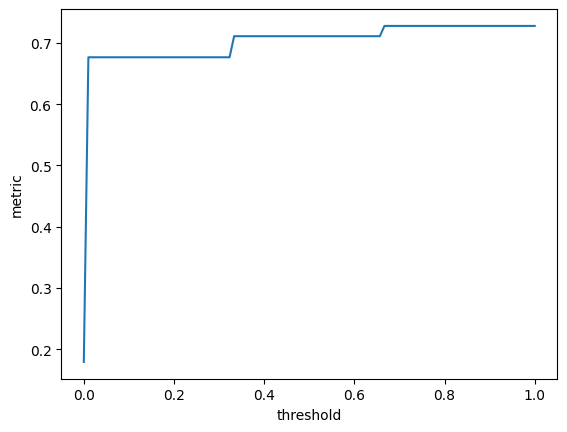

In [5]:
threshold_knn = threshold_tuning(model=knn, X_valid=X_valid, y_valid=y_valid)

d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

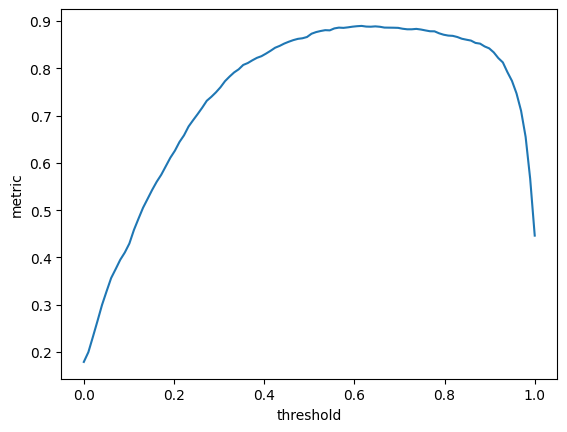

In [6]:
threshold_random_forest = threshold_tuning(model=random_forest, X_valid=X_valid, y_valid=y_valid)

d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\nandazman\anaconda3\envs\NANDA_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

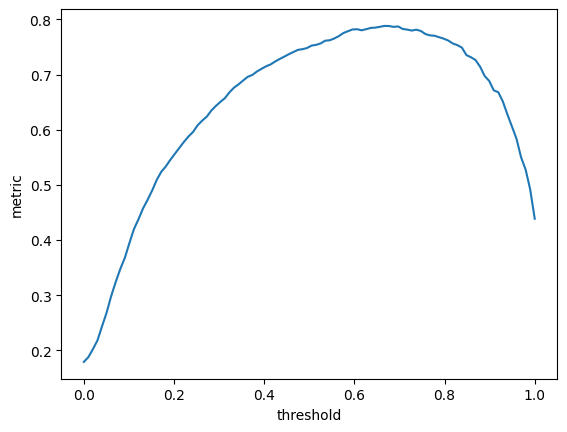

In [7]:
threshold_logistic_regression = threshold_tuning(model=logistic_regression, X_valid=X_valid, y_valid=y_valid)

In [9]:
def choose_best_threshold(thresholds, path):
    df = pd.DataFrame(thresholds)
    df.sort_values(by=['metric'], ascending=False, inplace=True)
    best_threshold = df.iloc[0]
    with open(path, "w") as file:
        file.write(best_threshold.to_json())
    
    return best_threshold

In [10]:
best_threshold_knn = choose_best_threshold(thresholds=threshold_knn, path="data/processed/knn_threshold.json")
best_threshold_random_forest = choose_best_threshold(thresholds=threshold_random_forest, path="data/processed/random_forest_threshold.json")
best_threshold_logistic_regression = choose_best_threshold(thresholds=threshold_logistic_regression, path="data/processed/logistic_regression_threshold.json")

In [11]:
X_test = utils.deserialize_data("data/processed/X_test_prep.pkl")
y_test = utils.deserialize_data("data/interim/y_test.pkl")

In [15]:
def evaluate_model(model, threshold, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold['threshold']).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(report['macro avg'])

In [16]:
evaluate_model(model=knn,threshold=best_threshold_knn, X_test=X_test,y_test=y_test)

{'precision': 0.7533424899690327, 'recall': 0.7199204251645481, 'f1-score': 0.7338376035616359, 'support': 3259.0}


In [17]:
evaluate_model(model=random_forest,threshold=best_threshold_random_forest, X_test=X_test,y_test=y_test)

{'precision': 0.9299067917847413, 'recall': 0.8463520104568929, 'f1-score': 0.8795155042563165, 'support': 3259.0}


In [18]:
evaluate_model(model=logistic_regression,threshold=best_threshold_logistic_regression, X_test=X_test,y_test=y_test)

{'precision': 0.7971130878840293, 'recall': 0.7946923982186189, 'f1-score': 0.7958907343936363, 'support': 3259.0}


Based on evaluation model, we can see that random forest has the bast score